# Multiple linear regression

## <span style="color:red">Initial Notes</span>

- Good models require multiple regressions, in order to address the higher complexity of problems

**Adjusted R-Squared**
1. The R-squared measures how much of the total variability is explained by our model
2. Multiple regressions are always better than simple ones, as with each additional variable you add, the explanatory power may only increase or stay the same

- Adjusted R-squared is always smaller than R-squared as it penalzies excessive use of variables

## <span style="color:red">Import the relevant libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

In [3]:
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [4]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


## <span style="color:red">Create your first multiple regression</span>

In [5]:
y = data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']] # Declaring x1 as a dataframe containing both series

In [6]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           6.58e-10
Time:                        14:57:29   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**What have we learned?**

We have slightly improved the R-squared, but the adjusted R-squared has gotten smaller.
- This is because the new set of data is useless. 
- We have added information, but have lost value
- We were penalized for adding a variable that has no explanatory power

Look at the coef table:
- The p-value for the Rand 1,2,3 variable has a p-value of 0.76
- We cannot reject the null hypothesis at 76% value
- This tells us it is insignificant

**In summary**
- We can add 100 variables to a model, and it will probably have outstanding predicting power
    - Makes regression analysis futile
- Simplicity is better rewarded than higher explanatory power

## <span style="color:red">OLS Assumptions</span>
<span style="color:blue">

1. Linearity
    
2. No endogeneity
    
3. Normality and homoscendasticity (constant variance)
    
4. No autocorrelation
    
5. No multicollinearity
</span>

- Biggest mistake you can make is to perform a regression that violates one of these assumptions

### <span style="color:blue">Linearity</span>
- The linear regression is the simplest non-trivial relationship
- Is the plot linear (straight line)?

**Fixes**
1. Run a non-linear regression
2. Exponential transformation
3. Log transformation

### <span style="color:blue">No Endogeneity</span>
**Omitted Variable Bias**
- Omitted variable bias occurs when you forget to include a variable. This is reflected in the error term as the factor you forgot about is included in the error. In this way, the error is not random but includes a systematic part (the omitted variable).
    - forget to include a relevant variable
    - hard to fix
    - leads to biased and counterintuitive estimates that are toxic to regressions

*Example*

London home pricing
- price = F(size)
    - smaller size of houses = higher price
    - covariance of independent variables and error terms is not 0
    
**Critical questioning**
1. Where did we draw the sample from? 
2. Can we get a better sample? 
3. Why is bigger real estate cheaper?
- Central London - OK
- Big enough - OK
4. What is it about smaller size that is making it so expensive?
5. Where are the small houses?
- City of London was in the sample
- We omitted location

### <span style="color:blue">Normality and Homoscendasticity </span>
1. Normality
    - assume error term is normally distributed
    - t-tests and f-tests work because we have assumed normality
    - What should we do if the error term is not normally distributed?
        - The Central Limit Theorem 
2. Zero mean
    - if the mean is not expected to be 0, then the line is not best fitting
        - however... having an intercept solves that problem
3. Homoscendasticity (of the error term)
    - have equal variance
    - error term should have equal variance one with the other
*Example*
- poor people have a more predictable spending pattern (low variability)
- wealthy people have more spending variance
- therefore, we expect heteroscendasticity

**Preventing heteroscendasticity**
1. Check for OVB
2. Look for outliers and try to remove them
3. Log transformation
    - take log of variable
    - create regression between log of y and independent x that is causing trouble

### <span style="color:blue">No Autocorrelation (aka no serial correlation)</span>

*Example* - Stock prices
- every day there is a new quote for the same stock
- ideally you want them to be random or predicted by GDP, tax rate, political events, etc
- The day-of-the-week effect
    - high returns on Fridays, low returns on Monday
    - read news on weekend, respond to negative on Monday
    - get new positive info on Thursdays and Fridays

**How to detect autocorrelation?**
- plot all residuals on a graph and look for patterns
    - if you can't find any, you are safe
- Durbin-Watson test
    - in summary from statsmodels
    - values fall between 0-4
        - 2 - no autocorrelation
        - <1 and >3 cause an alarm

**Remedy for autocorrelation?**
- there is no remedy
- need to avoid using linear regression in the precense of autocorrelation
    - options?
        - autoregressive model
        - moving average model
        - autoregressive moving average model
        - autoregressive integrated moving average model
        
Autocorrelation is not observed in cross-sectional data. You usually spot it at time series data, which is a subset of panel data.

### <span style="color:blue">No Multicollinearity (aka no serial correlation)</span>

- Observed when two or more variables have a high correlation

*Example*

a = 2 + 5 * b

    - a can be represented using b and vice versa
    - perfect multicollinearity
    - if a can be represented using b, there's no point in using both

*Example*

c,d have a correlation of 90%

    - imperfect multicollinearity
    - if c can be ALMOST represented using d, there's no point in using both
    
*Example*

Two bars (Bonkers and Shakespeare)
- What's the market share of Bonkers in different settings?
    - Most people only drink beer
    - Use three variables [price of half a pint (bonk), price of pint (bonk), price of pint (shake)]
    - Price of half a pint is more than half the price of a pint
    - p value shows half pint and pint are irrelevant because these prices move together

**How to fix?**
1. drop one of the two variables
2. transform into one (e.g. average price)
3. keep them both
    - risky, treat with extreme caution
    
**Prevention**
- Find the correlation between each two pairs of independent variables

## <span style="color:red">Dealing with Categorical Data</span>
    
**Dummy Variables**
- Imitation or substitute variable to include categorical data into a regression model
    - gender, season, brand, etc

*Example* - GPA

- Attendance is another good GPA measure, but it isn't numerical

In [8]:
raw_data = pd.read_csv('1.03. Dummies.csv')
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [10]:
data = raw_data.copy()

In [11]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [13]:
data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [14]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


Since the mean for attendance is below 0.5, we know there are more 0's than 1's

### Regression

In [15]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [17]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 07 Jun 2022   Prob (F-statistic):           2.19e-15
Time:                        15:14:42   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model becomes:

**GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Dummy (Attendance)**

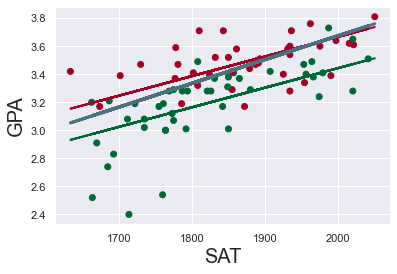

In [23]:
plt.scatter(data['SAT'], y, c=data['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
yhat = 0.0017*data['SAT'] + 0.275
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='#006837', label='regression line1')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='#a50026', label='regression line2')
fig = plt.plot(data['SAT'], yhat, lw=3, c='#4C7280', label='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

We have two equations that have the same slope, but different intercepts

## <span style="color:red">How to make predictions based on the regressions we create</span>

In [24]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


Let's create a new data frame and organize it in the same way as X
- Bob, who got 1700 on the SAT and did NOT attend
- Alice, who got 1670 on the SAT and ATTENDED

In [26]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [27]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


*Indicies are lost if you use (e.g.) NumPy transformations on the whole data frame

In [29]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [30]:
predictionsdf=pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


Alice scored lower on the SAT, but she attended >75% of lectures. So she is predicted to graduate with a higher GPA than Bob.